# Project - Data Insight - Covid data using Python Pandas

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
filepath="C://users//yogi//downloads//ongoing_outbreaks.csv"
covid_dataset = pd.read_csv(filepath)
covid_dataset.head(10)

,date,outbreak_group,outbreak_subgroup,number_ongoing_outbreaks
0,2020-11-01,1 Congregate Care,1 Long-Term Care Homes,73
1,2020-11-01,1 Congregate Care,2 Hospitals,21
2,2020-11-01,1 Congregate Care,3 Retirement Homes,51
3,2020-11-01,2 Congregate Living,18 Short-term accommodations,2
4,2020-11-01,2 Congregate Living,4 Group Home/Supportive Housing,31
5,2020-11-01,2 Congregate Living,5 Correctional Facility,4
6,2020-11-01,2 Congregate Living,6 Shelter,9
7,2020-11-01,3 Education,10 School - Post-Secondary,2
8,2020-11-01,3 Education,11 Child care,39
9,2020-11-01,3 Education,7 School - Elementary,29


#### total rows in dataset =10833
#### max cases in a day =426
#### min cases in a day = 1
#### avg cases per day= 25

In [151]:
covid_dataset.describe(include='all')


,date,outbreak_group,outbreak_subgroup,number_ongoing_outbreaks
count,10833,10833,10833,10833.000000
unique,512,7,28,NaN
top,2021-03-26,2 Congregate Living,1 Long-Term Care Homes,NaN
freq,24,2310,512,NaN
mean,NaN,NaN,NaN,25.381427
std,NaN,NaN,NaN,47.923233
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,8.000000
75%,NaN,NaN,NaN,24.000000


#### no null values in dataset

In [152]:
covid_dataset.isnull().sum()


date                        0
outbreak_group              0
outbreak_subgroup           0
number_ongoing_outbreaks    0
dtype: int64

### highest number of cases have seen in month of janurary 2022 in 1 Congregate Care (group living) having outbreak_subgroup as '1 Long-Term Care Homes'

In [153]:
covid_dataset.sort_values(by='number_ongoing_outbreaks',ascending=False).head(10)


,date,outbreak_group,outbreak_subgroup,number_ongoing_outbreaks
9840,2022-01-17,1 Congregate Care,1 Long-Term Care Homes,426
9818,2022-01-16,1 Congregate Care,1 Long-Term Care Homes,424
9884,2022-01-19,1 Congregate Care,1 Long-Term Care Homes,422
9862,2022-01-18,1 Congregate Care,1 Long-Term Care Homes,421
9927,2022-01-21,1 Congregate Care,1 Long-Term Care Homes,420
9906,2022-01-20,1 Congregate Care,1 Long-Term Care Homes,420
9796,2022-01-15,1 Congregate Care,1 Long-Term Care Homes,417
9948,2022-01-22,1 Congregate Care,1 Long-Term Care Homes,414
9774,2022-01-14,1 Congregate Care,1 Long-Term Care Homes,411
9968,2022-01-23,1 Congregate Care,1 Long-Term Care Homes,407


### below is top 10 days (date values) with highest total number of cases in a day

In [154]:
covid_dataset.groupby('date').sum().sort_values(by='number_ongoing_outbreaks',ascending=False).head(10)


,number_ongoing_outbreaks
date,
2022-01-17,1699
2022-01-16,1692
2022-01-18,1686
2022-01-19,1660
2022-01-20,1642
2022-01-15,1633
2022-01-21,1624
2022-01-14,1596
2022-01-22,1594


### Trend of covid cases from 15th jan 2020 to till now (27th march 2022)

<AxesSubplot:xlabel='date', ylabel='covid cases'>

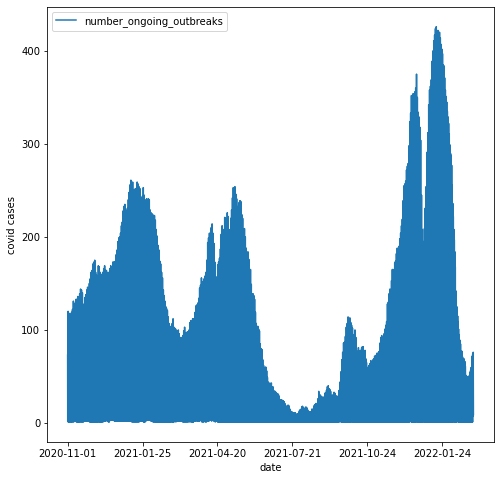

In [155]:
covid_dataset.plot(x='date',y='number_ongoing_outbreaks',figsize=(8, 8),ylabel='covid cases',xlabel='date')

In [159]:
group_data= covid_dataset.groupby('outbreak_group').sum()
print(group_data)

                            number_ongoing_outbreaks
outbreak_group                                      
1 Congregate Care                              92657
2 Congregate Living                            43845
3 Education                                    57698
4 Workplace                                    58360
5 Recreational                                 14742
6 Other/Unknown                                 7593
7 Out of Province Outbreak                        62


### Pie chart ('percentage cases distribution in out break groups')

<AxesSubplot:title={'center':'percentage cases distribution in out break groups'}, ylabel='number_ongoing_outbreaks'>

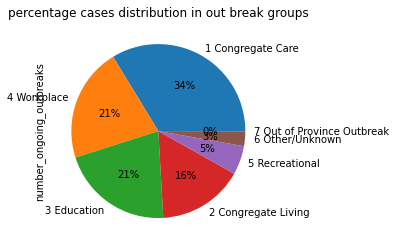

In [157]:

group_data.plot.pie(y='number_ongoing_outbreaks',title='percentage cases distribution in out break groups',autopct='%1.0f%%',legend=False)

### total no of cases per year

      number_ongoing_outbreaks
year                          
2020                     45148
2021                    164802
2022                     65007


<AxesSubplot:title={'center':'total no of cases per year'}, xlabel='year'>

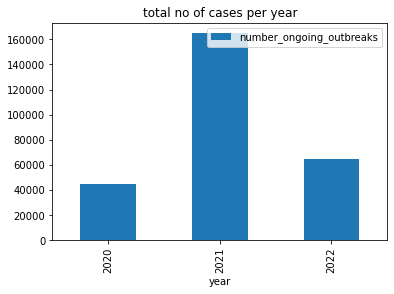

In [160]:
#changing datatype of date column to datetime
covid_dataset['date']=pd.to_datetime(covid_dataset.date)


year_dataset=covid_dataset.groupby(covid_dataset['date'].dt.year).sum()

year_dataset.index.rename('year',inplace=True)

print(year_dataset)

year_dataset.plot(kind='bar',title='total no of cases per year')

### total no of cases per month in year 2021

       number_ongoing_outbreaks
month                          
1                         32201
2                         19631
3                         18072
4                         23984
5                         19181
6                          5928
7                          2202
8                          2825
9                          5567
10                         6740
11                         8250
12                        20221


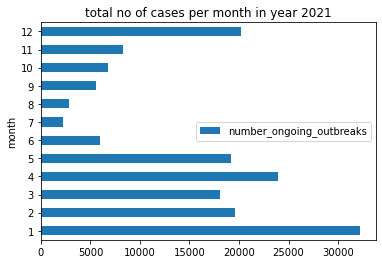

In [148]:
month_dataset=covid_dataset.query('date.dt.year==2021').groupby(covid_dataset['date'].dt.month).sum()

month_dataset.index.rename('month',inplace=True)

month_dataset.plot(kind='barh',title='total no of cases per month in year 2021')
print(month_dataset)